In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

In [35]:
df = pd.read_csv('Mall_Customers.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


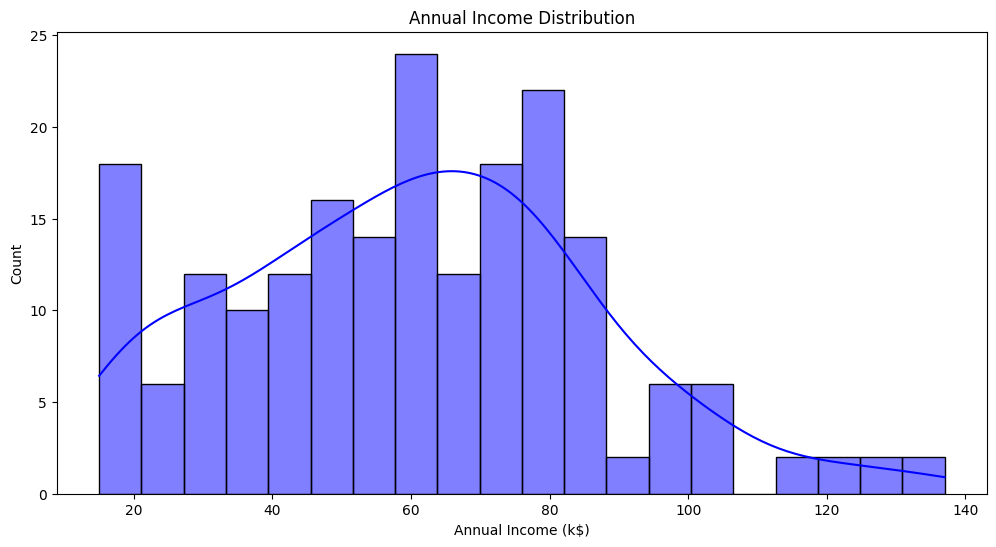

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='blue')
plt.title('Annual Income Distribution')
plt.show()

In [37]:
df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

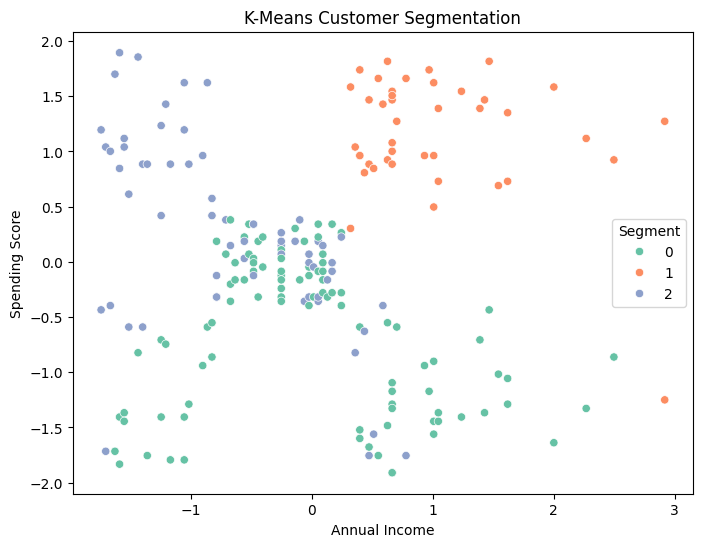

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 2], hue=df['Segment'], palette='Set2')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Customer Segmentation')
plt.show()

In [40]:
X = df.drop('Segment', axis=1)
y = df['Segment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    print(f"{name} F1 Score: {f1.mean():.4f}")

Random Forest F1 Score: 0.9457
SVM F1 Score: 0.9686
Logistic Regression F1 Score: 0.9807


In [50]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'max_iter': [1500, 2000],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro')
svm_grid.fit(X_train, y_train)

print("SVC Best Parameters:", svm_grid.best_params_)

SVC Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1500}


In [43]:
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[21  0  0]
 [ 0  5  0]
 [ 0  0 14]]


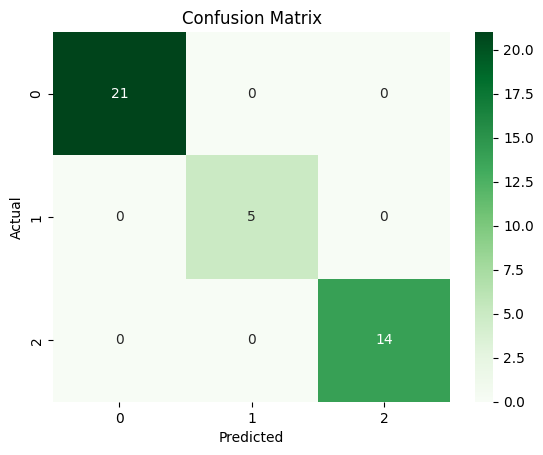

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1_macro')
rf_grid.fit(X_train, y_train)
print("Random Forest Best Parameters:", rf_grid.best_params_)

Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [48]:
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, scoring='f1_macro')
logreg_grid.fit(X_train, y_train)
print("Logistic Regression Best Parameters:", logreg_grid.best_params_)

C:\Users\Paramveer Kaur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Paramveer Kaur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Logistic Regression Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}


C:\Users\Paramveer Kaur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
models_results = {
    'Random Forest': rf_grid.best_score_,
    'SVM': svm_grid.best_score_,
    'Logistic Regression': logreg_grid.best_score_
}

for name, score in models_results.items():
    print(f"{name} F1 Macro Score: {score:.4f}")

Random Forest F1 Macro Score: 0.9640
SVM F1 Macro Score: 0.9807
Logistic Regression F1 Macro Score: 0.9807


C:\Users\Paramveer Kaur\AppData\Local\Temp\ipykernel_14012\1603814930.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models_results.keys()), y=list(models_results.values()), palette='viridis')


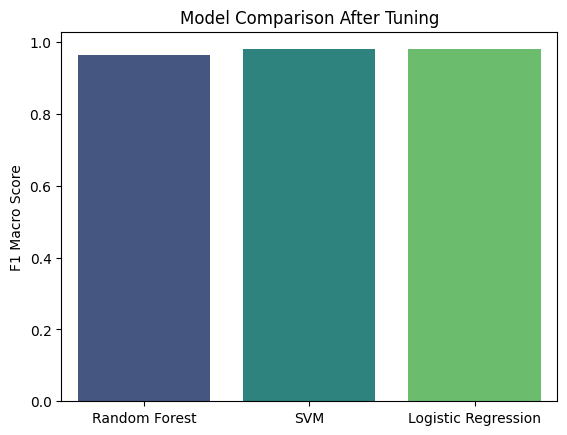

In [52]:
sns.barplot(x=list(models_results.keys()), y=list(models_results.values()), palette='viridis')
plt.ylabel('F1 Macro Score')
plt.title('Model Comparison After Tuning')
plt.show()